In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_excel("data/train.xlsx")

In [4]:
train.loc[9039]

Airline               Air India
Date_of_Journey       6/05/2019
Source                    Delhi
Destination              Cochin
Route                       NaN
Dep_Time                  09:45
Arrival_Time       09:25 07 May
Duration                23h 40m
Total_Stops                 NaN
Additional_Info         No info
Price                      7480
Name: 9039, dtype: object

In [3]:
train.dropna(inplace=True)

In [4]:
train.reset_index(inplace=True,drop=True)

In [5]:
train.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
train.shape

(10682, 11)

In [9]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [7]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])

In [8]:
train['Journey_Day'] = train['Date_of_Journey'].dt.day
train['Journey_Month'] = train['Date_of_Journey'].dt.month
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

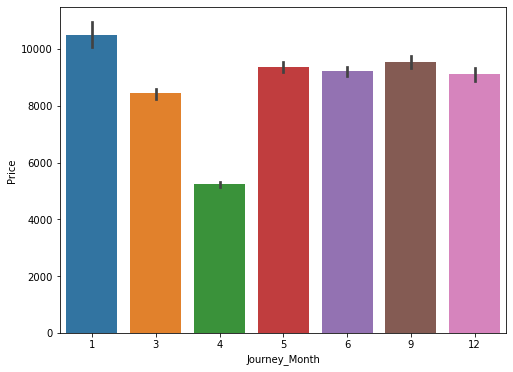

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(train['Journey_Month'],train['Price'])

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

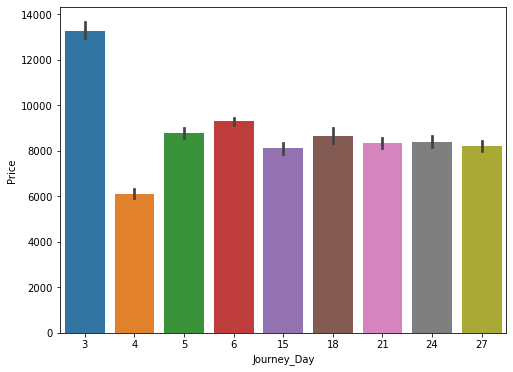

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(train['Journey_Day'],train['Price'])

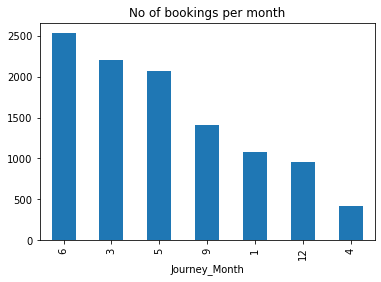

In [154]:
plt.title('No of bookings per month')
train.groupby('Journey_Month')['Price'].count().sort_values(ascending=False).plot(kind='bar')
plt.show()

Month of June(6) had the highest number of bookings

In [153]:
# No of bookings for each route in the month of June.
train[train['Journey_Month']==6].groupby(['Source','Destination'])['Price'].count().sort_values(ascending=False)

Source    Destination
Delhi     Cochin         1282
Kolkata   Banglore        509
Banglore  Delhi           330
Mumbai    Hyderabad       213
Chennai   Kolkata         107
Banglore  New Delhi        95
Name: Price, dtype: int64

Month of June(6) had the highest number of bookings so i checked where people travelled the most in this month.
1282 people travelled to Cochin from Delhi in June.
As June month marks the beginning of the monsoon season in cochin which boosts tourism, tourists must have travelled there.

In [20]:
# Average Prices of flights from Delhi to Cochin for each month.
train[(train['Source']=='Delhi')|(train['Destination']=='Cochin')].groupby('Journey_Month')['Price'].mean()

Journey_Month
1     10709.438356
3     10176.883625
4      6126.155963
5     10702.897679
6     10750.217018
9     11190.991241
12    10200.360000
Name: Price, dtype: float64

In [156]:
# No of bookings for each route overall.
train.groupby(['Source','Destination'])['Price'].count().sort_values(ascending=False)

Source    Destination
Delhi     Cochin         4537
Kolkata   Banglore       2871
Banglore  Delhi          1265
          New Delhi       932
Mumbai    Hyderabad       697
Chennai   Kolkata         381
Name: Price, dtype: int64

But this can also be due to majority of data is of the same trip.

<AxesSubplot:xlabel='Source'>

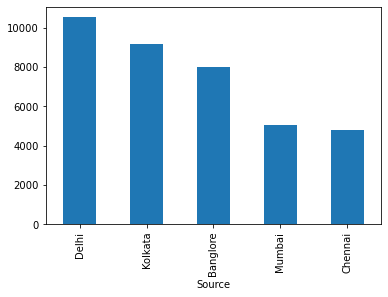

In [99]:
train.groupby('Source')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Destination'>

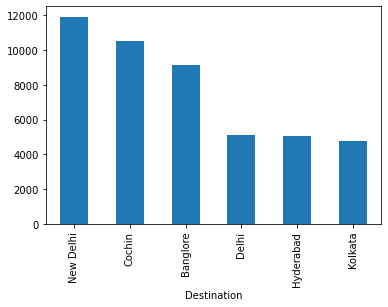

In [100]:
train.groupby('Destination')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Airline', ylabel='Price'>

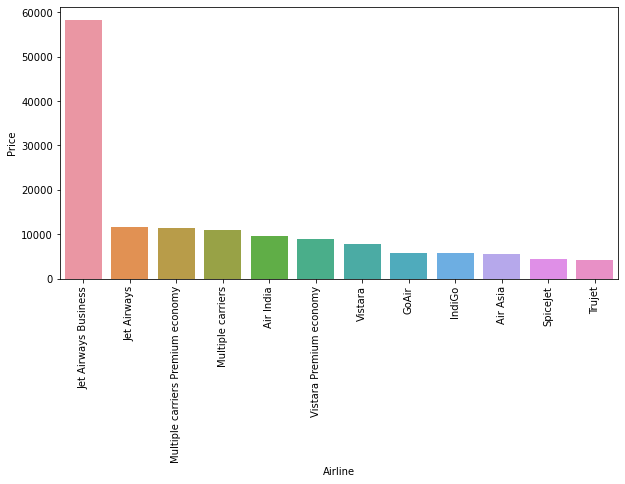

In [188]:
# Average price of different airlines.
df = pd.DataFrame(train.groupby('Airline')['Price'].mean().sort_values(ascending=False)).reset_index()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot('Airline','Price',data=df)

If we ignore business class,premium economy and Trujet as Trujet only has one booking, Spicejet has the lowest average price followed by Air Asia and Indigo and Jet Airways had the highest average price.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

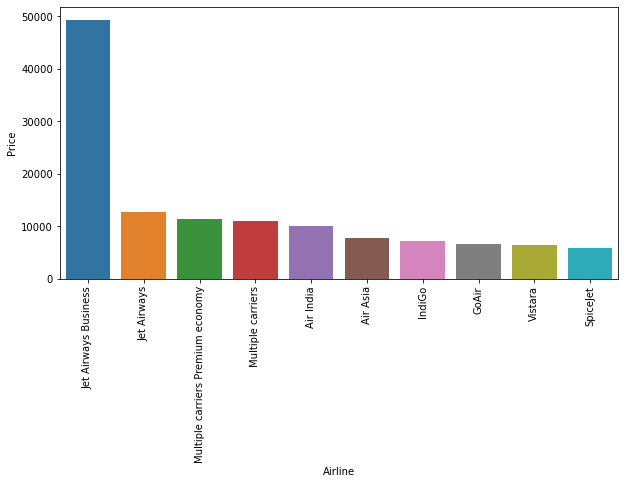

In [21]:
# Average price of airlines for route(Delhi to Cochin).
df = pd.DataFrame(train[(train['Source']=='Delhi')|(train['Destination']=='Cochin')].groupby(
    'Airline')['Price'].mean().sort_values(ascending=False)).reset_index()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot('Airline','Price',data=df)

Follows a similar pattern here.

In [22]:
source = train['Source'].value_counts()
destn = train['Destination'].value_counts()
print(source,'\n',destn)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64 
 Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


Delhi to Cochin


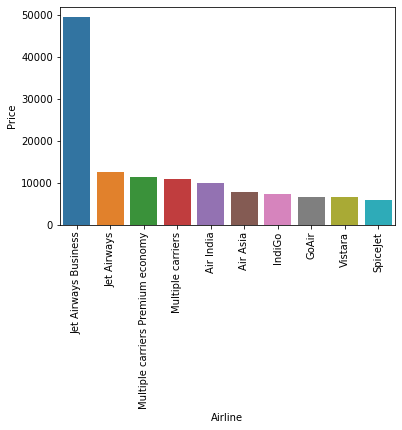

Kolkata to Banglore


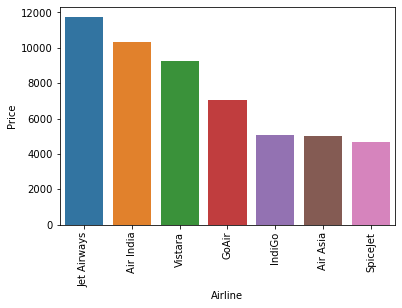

Banglore to Delhi


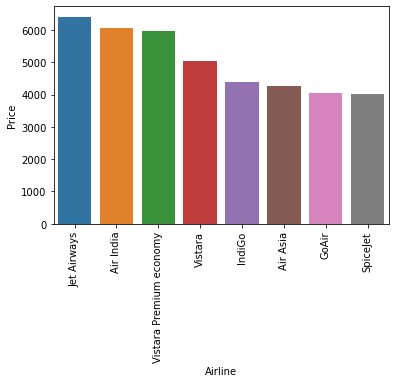

Banglore to New Delhi


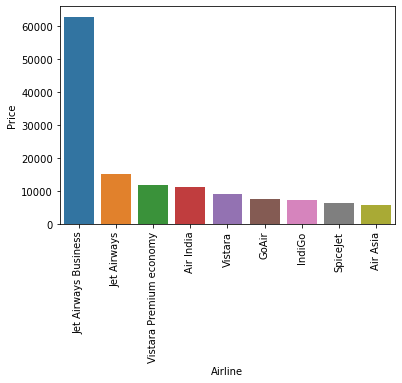

Mumbai to Hyderabad


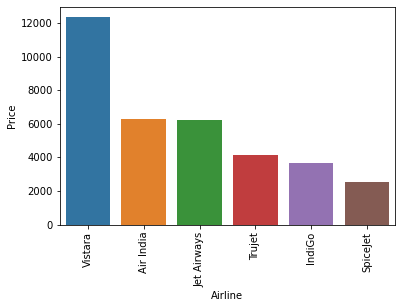

Chennai to Kolkata


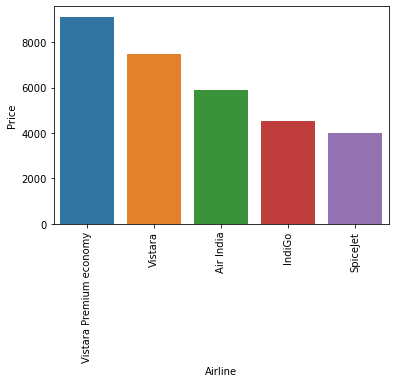

In [31]:
for s in source.index:
    for d in destn.index:
        df = pd.DataFrame(train[(train['Source']==s)&(train['Destination']==d)].groupby(
        'Airline')['Price'].mean().sort_values(ascending=False)).reset_index()
    #     plt.figure(figsize=(10,5))
        plt.xticks(rotation=90)
        if len(df)>0:
            print('{0} to {1}'.format(s,d) )
            sns.barplot('Airline','Price',data=df)
            plt.show()

In [9]:
# Duration was in hours(2h 50m), converted them to minutes(170 mins)
def clean_duration(df,col):
    for i in range(len(df)):
        a = df[col].loc[i].split(' ')
        if(len(a) == 2):
            hours = int(re.split('(\D+)',a[0])[0])
            minutes = int(re.split('(\D+)',a[1])[0])
            total_mins =(hours*60)+minutes
            df[col][i] = total_mins
        else:
            hours = int(re.split('(\D+)',a[0])[0])
            total_mins =(hours*60)
            df[col][i] = total_mins    

In [10]:
train.reset_index(inplace=True)
train.drop(["index"],axis=1,inplace=True)
clean_duration(train,"Duration")
train.rename(columns={"Duration":"Duration_in_mins"},inplace=True)

In [17]:
train["Duration_in_mins"] = train["Duration_in_mins"].astype('int64')

In [18]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_in_mins,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1


In [ ]:
no of stops with higher duration has higher prices?

In [19]:
train.describe()

,Duration_in_mins,Price,Journey_Day,Journey_Month
count,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.048118,9087.214567,12.682925,5.534731
std,507.803454,4611.548810,8.803800,2.987626
min,75.000000,1759.000000,3.000000,1.000000
25%,170.000000,5277.000000,5.000000,3.000000
50%,520.000000,8372.000000,6.000000,5.000000
75%,930.000000,12373.000000,21.000000,6.000000
max,2860.000000,79512.000000,27.000000,12.000000


In [30]:
bins = [0,120,240,480,720,1200,2860]
label = ['<2','2-4','4-8','8-12','12-20','>20']
train['Duration_Range'] = pd.cut(train['Duration_in_mins'],bins=bins,labels=label)

In [31]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration_in_mins,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Range
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2-4
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,5,1,4-8
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,6,9,12-20
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,5,12,4-8
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,3,1,4-8


<AxesSubplot:xlabel='Duration_Range', ylabel='Price'>

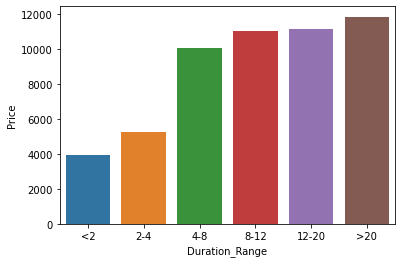

In [47]:
# Average Price with respect to Duration
df = pd.DataFrame(train.groupby(['Duration_Range'])['Price'].mean()).reset_index()
sns.barplot('Duration_Range','Price',data=df)

Prices are directly proportional to the Duration of flight.
But this can also depend on the route. 
So lets check for a single route.

<AxesSubplot:xlabel='Duration_Range', ylabel='Price'>

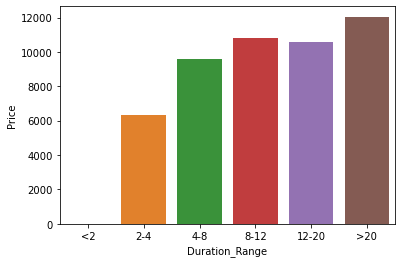

In [46]:
# Average Price with respect to Duration for route Delhi to Cochin
df = pd.DataFrame(train[(train['Source']=='Delhi')|(train['Destination']=='Cochin')].groupby(
    'Duration_Range')['Price'].mean()).reset_index()
sns.barplot('Duration_Range','Price',data=df)

It follows a somewhat similar pattern.

<AxesSubplot:xlabel='Duration_Range', ylabel='Price'>

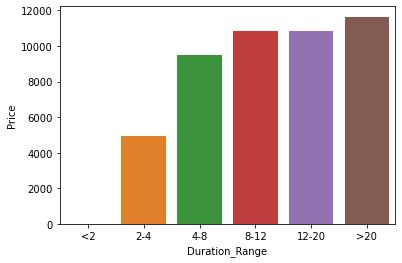

In [49]:
# Average Price with respect to Duration for route Delhi to Banglore.
df = pd.DataFrame(train[(train['Source']=='Delhi')|(train['Destination']=='Banglore')].groupby(
    'Duration_Range')['Price'].mean()).reset_index()
sns.barplot('Duration_Range','Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

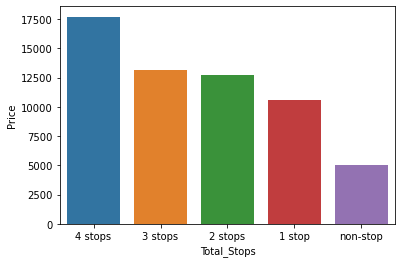

In [58]:
# Average Price w.r.t Total No of Stops.
df = pd.DataFrame(train.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False)).reset_index()
sns.barplot('Total_Stops','Price',data=df)

Price is also directly proportional to no of stops.
Lets now check if its the case for all airlines or for certain airlines only.

In [113]:
airlines

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

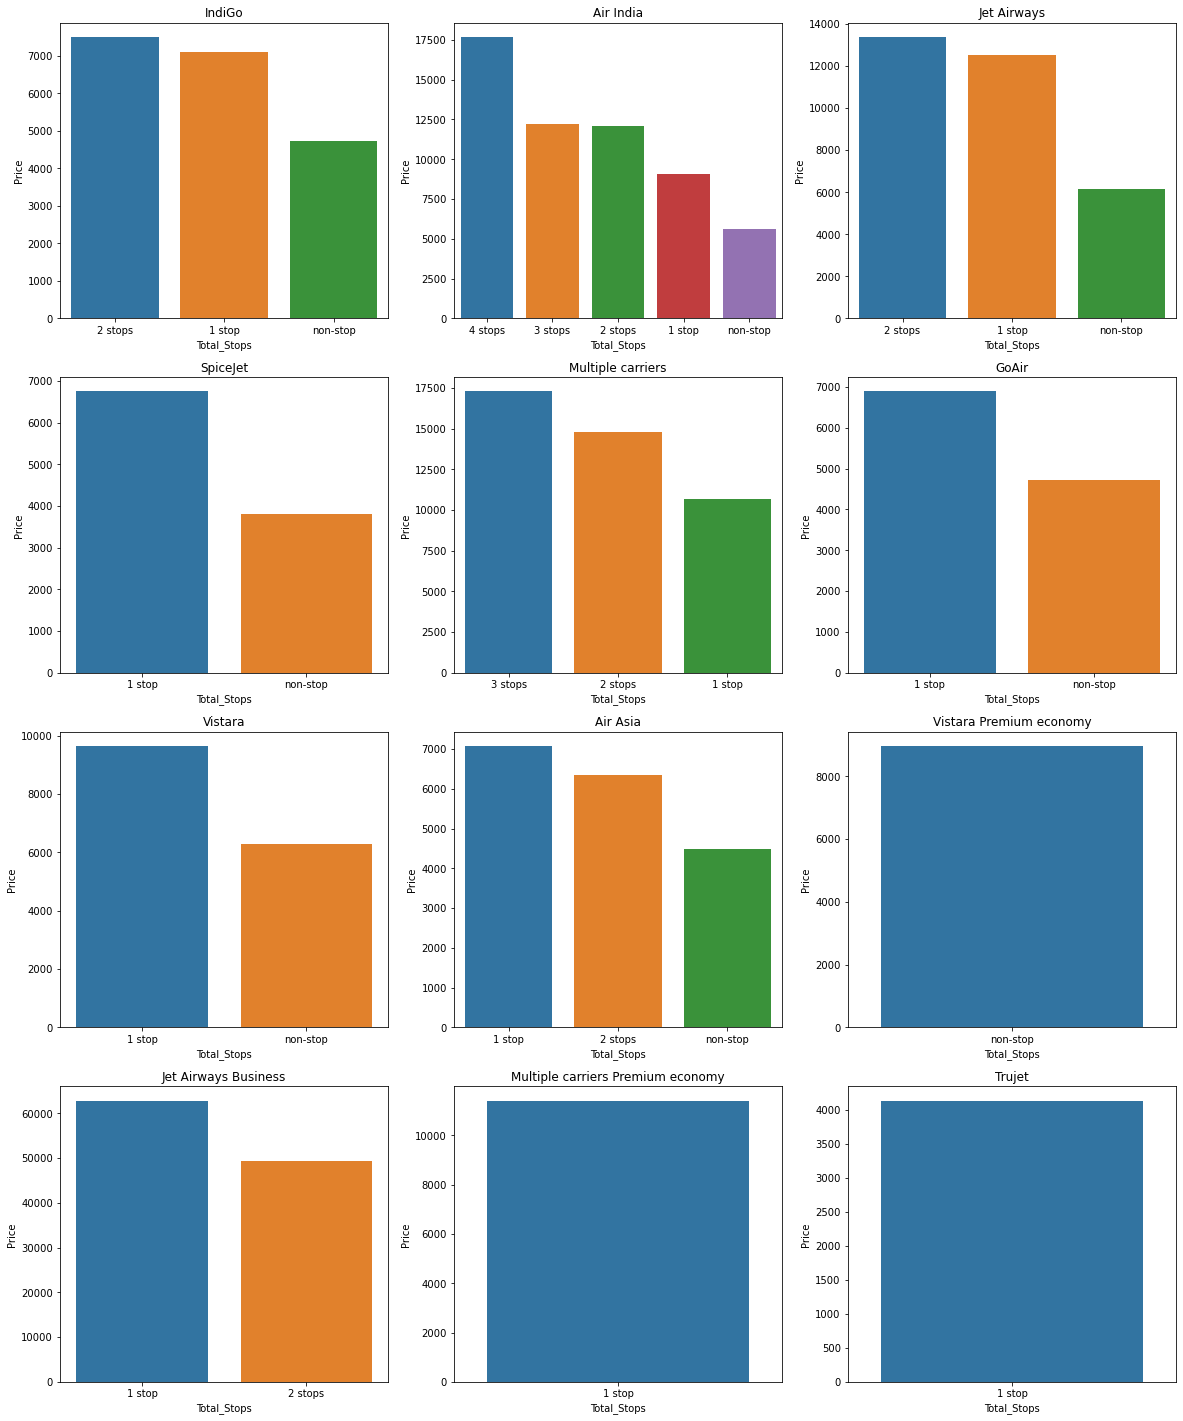

In [140]:
# Average Price w.r.t to Total no of Stops
airlines = train['Airline'].unique()
fig, axes = plt.subplots(4,3,figsize=(20,25))
c=0
for i in range(4):
    airlines_new = airlines[c:c+3]
    for a,j in zip(airlines_new,range(3)):
        df = pd.DataFrame(train[train['Airline']==a].groupby(
            ['Total_Stops'])['Price'].mean().sort_values(ascending=False)).reset_index()
        axes[i][j].title.set_text(a)
        sns.barplot('Total_Stops','Price',data=df,ax=axes[i][j]) 
        c=c+1
plt.show()

Its a similar pattern for all airlines except Air Asia